## Polynomial Regression

### Import the libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the dataset

In [90]:
dataset = pd.read_csv('Position_Salaries.csv')
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


### Spliting the dataset into the Traning set and Test set

In [66]:
# since column 1(position) and column 2(level) are redundant, we only use 'level'column(label of position)
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Training the Simple Linear Regression model on the Training set

In [67]:
# import the 'LinearRegression' class from sklearn package 'linear_model'
from sklearn.linear_model import LinearRegression

# create the linear regression model
regressor_lin = LinearRegression()

# train the model with the whole dataset(x and y)
regressor_lin.fit(x,y)
pred_y = regressor_lin.predict(x)


### Training the Polynomial Regression model on the Training set
* final polynomial regression model will be combinated with polynomial features and linear regression


In [70]:
# preprocess polynomial feature using 'PolynomialFeatures' class
from sklearn.preprocessing import PolynomialFeatures

# degree(parameter for n) = 2
regressor_poly = PolynomialFeatures(degree = 2)

# x_poly - fit_transform() apply to x 
x_poly = regressor_poly.fit_transform(x)

# create new linear regression model and train it! 
regressor_lin2 = LinearRegression()
regressor_lin2.fit(x_poly,y)

pred_y2 = regressor_lin2.predict(x_poly)

#### => Visualize the results for both model to see the difference of results

### Visualising the Linear Regression results

Text(0, 0.5, 'Salary')

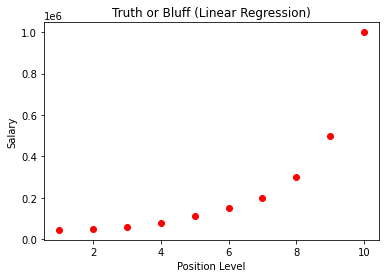

In [76]:
# real dataset
plt.scatter(x,y, color='red')

plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

# predicted result
plt.plot(x_poly,pred_y)

=> As a result, the linear regression model is not well adapted this dataset
> the company gonna pay the employy much higher for level4~9

> NOT a good prediction!

> the graph is 

### Visualising the Polynomial Regression results

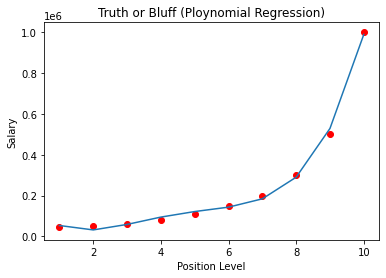

In [56]:
# real dataset
plt.scatter(x,y, color='red')

plt.title('Truth or Bluff (Ploynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

# predicted result
plt.plot(x,pred_y2)

# show the result
plt.show()

=> As a result, we achieved a polynomial regression curve which is way more well adpated than linear regression
> the predicted salary using polynomial regression get much closer to the real salary

> If we change the degree in polynomial features, we will get higher resolution and smoother curve 

### Visualising the Polynomial Regression results (for higher resolution and smoother curve)

In [51]:
# preprocess polynomial feature using 'PolynomialFeatures' class
from sklearn.preprocessing import PolynomialFeatures

# RETRAIN THE MODEL with degree(parameter for n) = 4 
regressor_poly = PolynomialFeatures(degree = 4)

# x_poly - fit_transform() apply to x 
x_poly = regressor_poly.fit_transform(x)

# create new linear regression model and train it! 
regressor_lin2 = LinearRegression()
regressor_lin2.fit(x_poly,y)


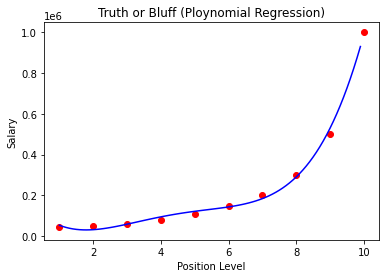

In [61]:
# make the curve smoother 
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))

# real dataset
plt.scatter(x,y, color='red')

# predicted result
# pred_y2 = regressor_lin2.predict(x_poly)
plt.plot(x_grid, regressor_lin2.predict(regressor_poly.fit_transform(x_grid)), color = 'blue')

plt.title('Truth or Bluff (Ploynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

# show the result
plt.show()


=> As a result, the new polynomial regression curve with degree 4 is perfectly fitting to the dataset!
> It's OVERFITTING but it's okay since we want to get perfect prediction between level 6 and 7. 

### Predicting a new result with Linear Regression

In [78]:
regressor_lin.predict([[6.5]])

array([330378.78787879])

=> the predicted salary for this person is way overthan real salary
> Prediction is WRONG ! 

### Predicting a new result with Polynomial Regression

In [88]:
regressor_lin2.predict(regressor_poly.fit_transform([[6.5]]))

array([189498.10606061])

=> the predicted salary for this person is super closed real salary
> In real dataset, the salary between level 6 and 7 is 150000 to 200000
> Therefore, it's GOOD Prediction ! 